In [2]:
library(tidyverse)
library(RColorBrewer)

options(repr.plot.width = 10, repr.plot.height = 10)

# you might need to change these directories depends on where the results you downloaded or saved to.
indir = '../Benchmarking/results/simulated/collated_results/'

# Uncomment output directory and code blocks for saving plots if wanted.
outdir = './Benchmarking'
dir.create(outdir)

outdir = 'imgs'
dir.create(outdir)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.3     ✔ purrr   1.0.0
✔ tibble  3.2.1     ✔ dplyr   1.1.0
✔ tidyr   1.2.1     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message in dir.create(outdir):
“'imgs' already exists”


# Benchmarking on simulated data

The collated benchmarking results for the simulated data are loaded in order to plot summary statistics.

## Simulated data based on Zeisel

In [3]:
# Rename file to name of the benchmarking results.
zeisel_eval <- readRDS(file.path(indir, "zeisel_splatter_sim_results.rds"))

# Not a single BC_Spectral run was successful and therefore removed.
zeisel_eval <- zeisel_eval %>% 
    filter(algorithm != 'BC_Spectral')

head(zeisel_eval)

algorithm,ARI_cells,ARI_genes,relevance,recovery,clustering_error,RNIA,fuzzyARI_cells,ARI_cells_old,ngenes,⋯,maxColSz,simThresh,isdivbiclust,numLevels,stop_const,low_thrs,help,dePROB,defacLOC,defacSCALE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
BackSPIN,0.4951362,0.3283997,0.172955,0.1475537,0.05373967,0.06748984,0.4951362,0.4951362,2000,⋯,100,0.5,FALSE,3,0.500,0.1,FALSE,0.02,0.75,0.75
BackSPIN,0.4951362,0.3283997,0.172955,0.1475537,0.05373967,0.06748984,0.4951362,0.4951362,2000,⋯,100,0.5,FALSE,3,0.500,0.2,FALSE,0.02,0.75,0.75
BackSPIN,0.4951362,0.3283997,0.172955,0.1475537,0.05373967,0.06748984,0.4951362,0.4951362,2000,⋯,100,0.5,FALSE,3,0.500,0.3,FALSE,0.02,0.75,0.75
BackSPIN,0.4951362,0.3283997,0.172955,0.1475537,0.05373967,0.06748984,0.4951362,0.4951362,2000,⋯,100,0.5,FALSE,3,0.825,0.1,FALSE,0.02,0.75,0.75
BackSPIN,0.4951362,0.3283997,0.172955,0.1475537,0.05373967,0.06748984,0.4951362,0.4951362,2000,⋯,100,0.5,FALSE,3,0.825,0.2,FALSE,0.02,0.75,0.75
BackSPIN,0.4951362,0.3283997,0.172955,0.1475537,0.05373967,0.06748984,0.4951362,0.4951362,2000,⋯,100,0.5,FALSE,3,0.825,0.3,FALSE,0.02,0.75,0.75


For each algorithm we run it with 108 parameter combinations. We can see below that some algorithms failed to produce results on some runs:

In [4]:
table(zeisel_eval$algorithm,
      paste(zeisel_eval$dePROB, zeisel_eval$defacLOC, zeisel_eval$defacSCALE, sep="_"))

                  
                   0.02_0.75_0.75 0.02_1.5_1.5 0.06_0.75_0.75 0.06_1.5_1.5
  BackSPIN                    108          108            108          108
  Bimax                        38           36             36           45
  CCA                         106          105            106          105
  IRISFGM                      81           81             81           81
  Monocle3                    105          108            108          108
  Plaid                       108          108            108          108
  QUBIC                       108          108            108          108
  Seurat                      108          108            108          108
  Unibic                      108          108            108          108
  Xmotifs                     108          108            108          108
  caclust_igraph              108          108            108          108
  caclust_leiden              108          108            108          108
  cacl

## Simulated data based on pbmc3k

In [5]:
# Rename file to name of the benchmarking results.
pbmc_eval <- readRDS(file.path(indir, "pbmc3k_splatter_sim_results.rds"))

pbmc_eval <- pbmc_eval %>% filter(algorithm != "BC_Spectral")

head(pbmc_eval)

algorithm,ARI_cells,ARI_genes,relevance,recovery,clustering_error,RNIA,fuzzyARI_cells,ARI_cells_old,ngenes,⋯,maxColSz,simThresh,isdivbiclust,numLevels,stop_const,low_thrs,help,dePROB,defacLOC,defacSCALE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
BackSPIN,0.6303803,0.04043754,0.07622965,0.1020767,0.08597966,0.08846235,0.6303803,0.6303803,2000,⋯,100,0.5,FALSE,3,0.500,0.1,FALSE,0.02,0.75,0.75
BackSPIN,0.6303803,0.04043754,0.07622965,0.1020767,0.08597966,0.08846235,0.6303803,0.6303803,2000,⋯,100,0.5,FALSE,3,0.500,0.2,FALSE,0.02,0.75,0.75
BackSPIN,0.6303803,0.04043754,0.07622965,0.1020767,0.08597966,0.08846235,0.6303803,0.6303803,2000,⋯,100,0.5,FALSE,3,0.500,0.3,FALSE,0.02,0.75,0.75
BackSPIN,0.6303803,0.04043754,0.07622965,0.1020767,0.08597966,0.08846235,0.6303803,0.6303803,2000,⋯,100,0.5,FALSE,3,0.825,0.1,FALSE,0.02,0.75,0.75
BackSPIN,0.6303803,0.04043754,0.07622965,0.1020767,0.08597966,0.08846235,0.6303803,0.6303803,2000,⋯,100,0.5,FALSE,3,0.825,0.2,FALSE,0.02,0.75,0.75
BackSPIN,0.6303803,0.04043754,0.07622965,0.1020767,0.08597966,0.08846235,0.6303803,0.6303803,2000,⋯,100,0.5,FALSE,3,0.825,0.3,FALSE,0.02,0.75,0.75


In [5]:
table(pbmc_eval$algorithm, 
      paste(pbmc_eval$dePROB, pbmc_eval$defacLOC, pbmc_eval$defacSCALE, sep="_"))

                  
                   0.02_0.75_0.75 0.02_1.5_1.5 0.06_0.75_0.75 0.06_1.5_1.5
  BackSPIN                    108          108            108          108
  Bimax                       108          108            108          108
  CCA                         108          108            108          108
  IRISFGM                      81           81             81           81
  Monocle3                    103          107            108          108
  Plaid                       108          108            108          108
  QUBIC                       108          108            108          108
  Seurat                      108          108            108          108
  Unibic                      106          108            106          108
  Xmotifs                     108          108            108          108
  caclust_igraph              108          108            108          108
  caclust_leiden              108          108            108          108
  cacl

## Evaluation

In [6]:
dfz <- zeisel_eval %>%
    mutate(dataset = "zeisel") %>%
    mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
    mutate(algorithm = gsub("divbiclust", "DivBiclust", algorithm)) %>%
    mutate(simulation = paste(dePROB, defacLOC, defacSCALE, sep="_")) %>%
    mutate(simulation = factor(simulation, levels = c('0.02_0.75_0.75', 
                                                      '0.06_0.75_0.75',
                                                      '0.1_0.75_0.75',
                                                      '0.02_1.5_1.5',
                                                      '0.06_1.5_1.5',
                                                      '0.1_1.5_1.5')))

dfp <- pbmc_eval %>%
    mutate(dataset = "pbmc3k") %>%
    mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
    mutate(algorithm = gsub("divbiclust", "DivBiclust", algorithm)) %>%
    mutate(simulation = paste(dePROB, defacLOC, defacSCALE, sep="_")) %>%
    mutate(simulation = factor(simulation, levels = c('0.02_0.75_0.75', 
                                                      '0.06_0.75_0.75',
                                                      '0.1_0.75_0.75',
                                                      '0.02_1.5_1.5',
                                                      '0.06_1.5_1.5',
                                                      '0.1_1.5_1.5')))

df_all <- rbind(dfz,dfp)
df <- df_all %>% group_by(simulation, algorithm, dataset) %>%
        mutate(mean_CE = mean(clustering_error, na.rm = TRUE)) %>%
        select(dataset, simulation, algorithm, mean_CE) %>%
        distinct() %>%
        ungroup()

df$algorithm <- gsub("sv4d", "s4vd", df$algorithm)

df$algorithm <- factor(df$algorithm, levels = c('CAbiNet_igraph',
                                                'CAbiNet_leiden',
                                                'CAbiNet_spectral',
                                                'Seurat',
                                                'Monocle3',
                                                'Bimax',
                                                'CCA',
                                                'QUBIC',
                                                'IRISFGM',
                                                's4vd',
                                                'Plaid',
                                                'Unibic',
                                                'Xmotifs',
                                                'DivBiclust',
                                                'BackSPIN'
                                                ))

### Figure 5

#### panel a - runtime

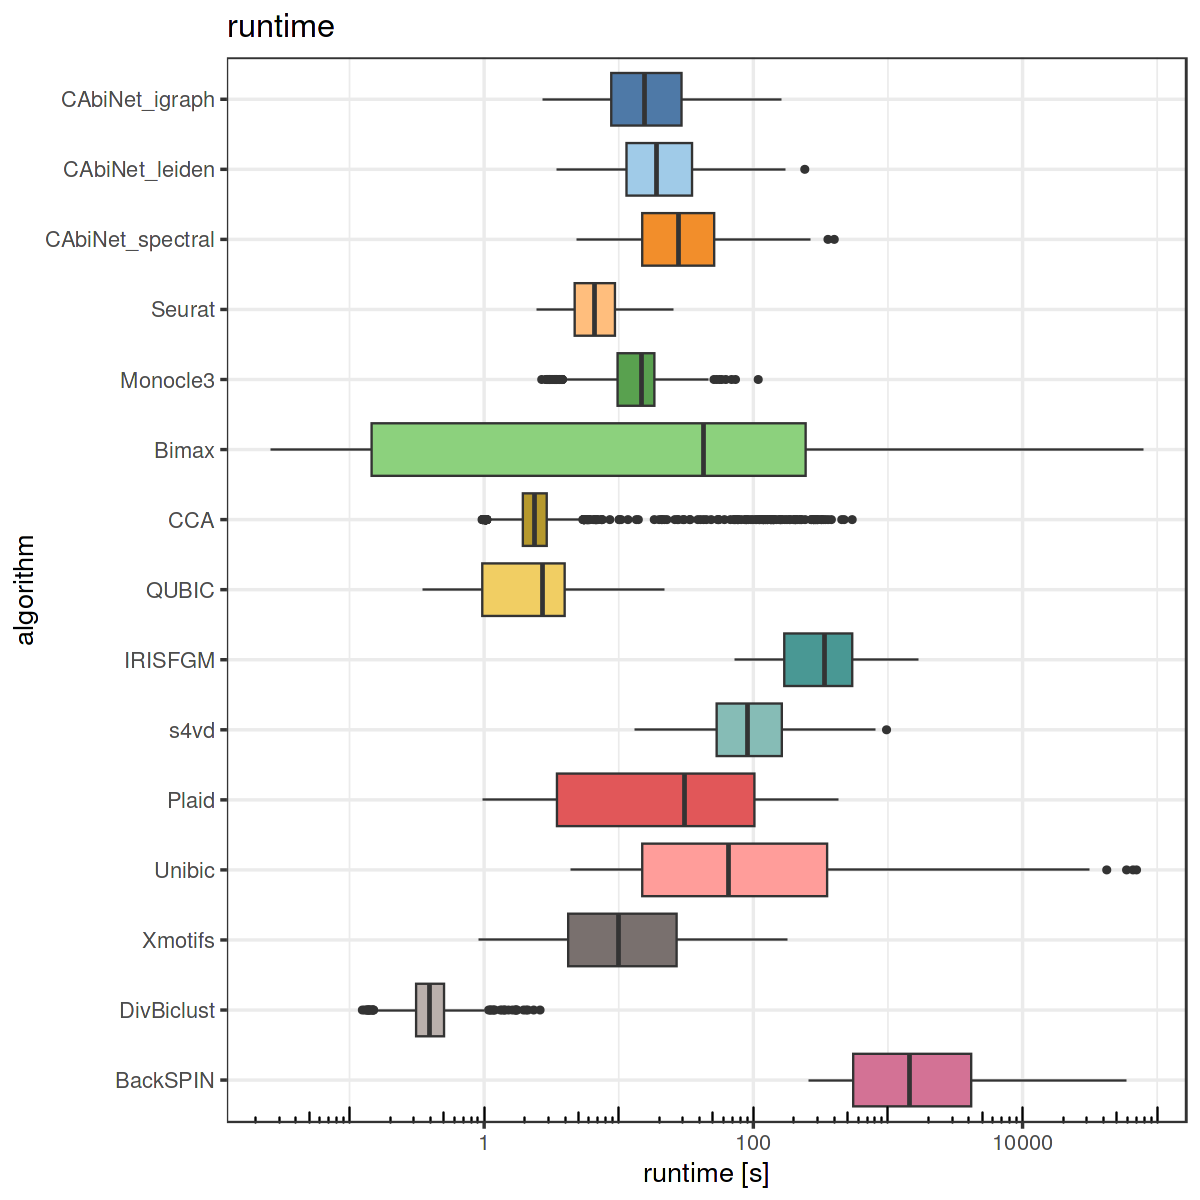

In [7]:

total_runtime <- df_all %>%
    mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
    mutate(total_runtime = if_else(condition = is.na(runtime_dimreduc),
                                   true = runtime,
                                   false = runtime + runtime_dimreduc)) %>%
    mutate(algorithm = gsub("sv4d", "s4vd", algorithm)) %>%
    mutate(algorithm = factor(algorithm, levels = c('CAbiNet_igraph',
                                                'CAbiNet_leiden',
                                                'CAbiNet_spectral',
                                                'Seurat',
                                                'Monocle3',
                                                'Bimax',
                                                'CCA',
                                                'QUBIC',
                                                'IRISFGM',
                                                's4vd',
                                                'Plaid',
                                                'Unibic',
                                                'Xmotifs',
                                                'DivBiclust',
                                                'BackSPIN'
                                                )))

p <- ggplot(total_runtime, aes(x=algorithm, y = total_runtime, fill = algorithm)) +
    geom_boxplot() +
    scale_y_log10() +
    annotation_logticks(sides = "b") +
    scale_x_discrete(limits = rev(levels(total_runtime$algorithm))) +
    coord_flip() +
    labs(title = "runtime",
         y = "runtime [s]",
         x = "algorithm") +
    theme_bw() +
    ggthemes::scale_fill_tableau(palette = "Tableau 20") +
    scale_color_manual(values = list("zeisel" = "#cf3e53", "pbmc3k" = "#466f9d")) + # "#ed444a"
    theme_bw(base_size = 16) +
    theme(legend.position = "none")


p

#ggsave(plot = p, 
#       filename = file.path(outdir, "total_runtime_fig6_panel_a.pdf"),
#       width = 1850,
#       height = 1650,
#       units = "px")

#### panel b - Clustering Error (CE)

Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


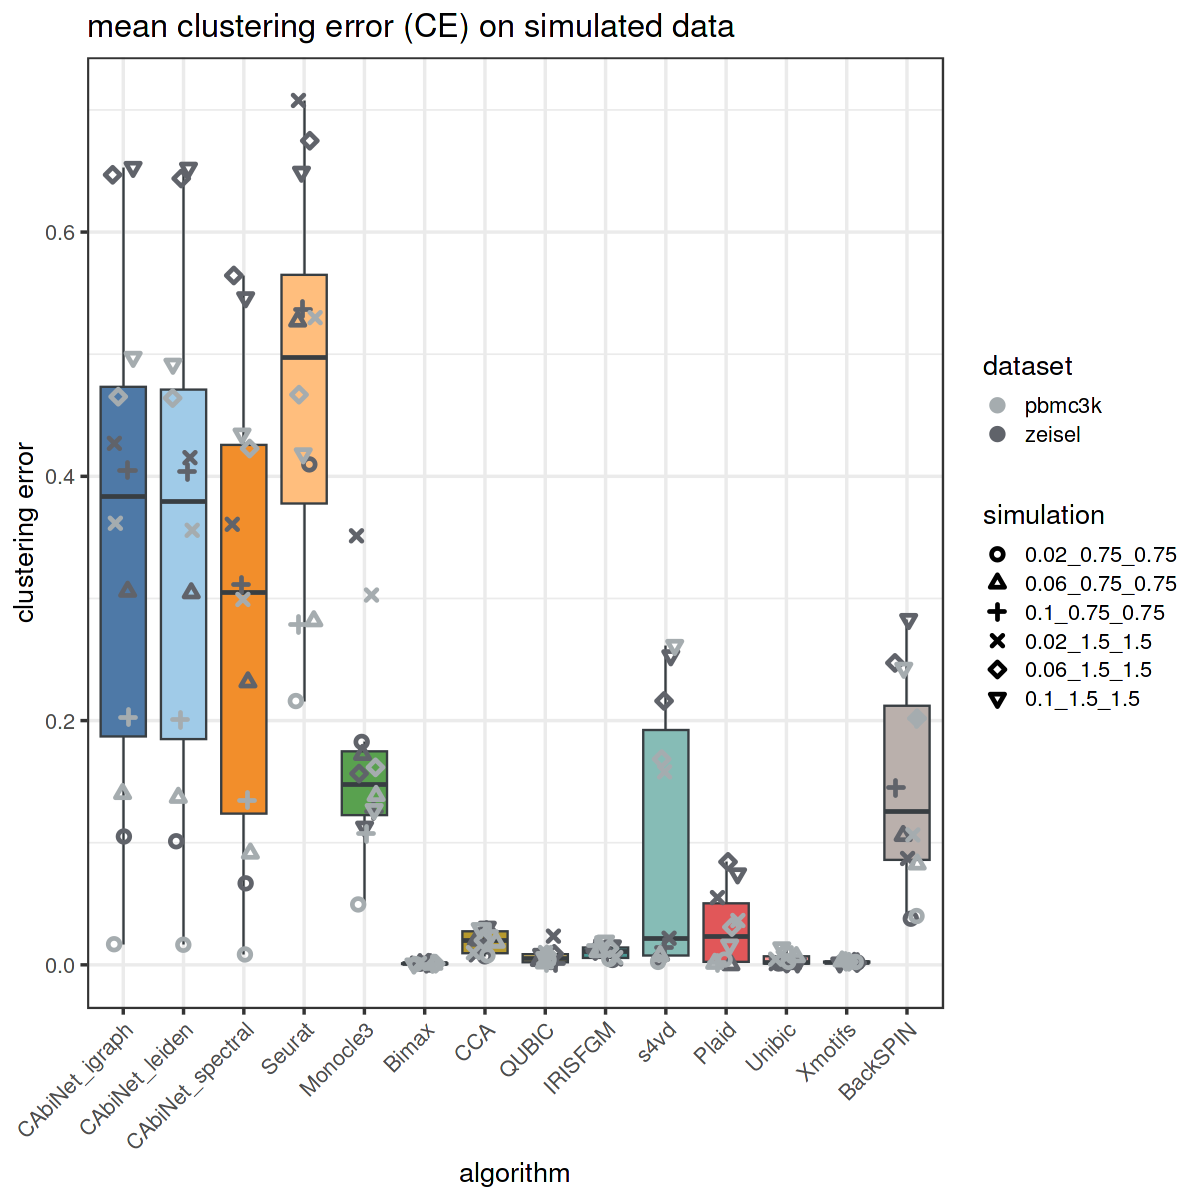

In [8]:

p <- df %>% filter(algorithm != 'DivBiclust') %>%
ggplot(aes(x=algorithm, 
           y=mean_CE)) +
    geom_boxplot(aes(fill = algorithm),
                 color = "#383e42", 
                 alpha = 1, 
                 outlier.alpha = 0)+
    geom_jitter(aes(x=algorithm, 
                    y=mean_CE, 
                    color = dataset, 
                    group = dataset, 
                    shape = simulation),
                    stroke =1.5,
                    size = 2,
                    width = 0.2) +
    labs(title = "mean clustering error (CE) on simulated data",
         y = "clustering error",
         x = "algorithm") +
    scale_shape_manual(values = seq_len(length(df$simulation))) +
    ggthemes::scale_fill_tableau(palette = "Tableau 20",
                              type = "regular",
                              direction = 1)+
    scale_color_manual(values = list("zeisel" = "#60636a", "pbmc3k" = "#a5acaf")) + 
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    guides(fill = "none")

p


#ggsave(plot = p, 
#       filename = file.path(outdir, "CE_summary_mean_fig5_panel_b.pdf"),
#       width = 2500,
#       height = 1650,
#       units = "px")


In [9]:
df %>% filter(algorithm != 'DivBiclust') %>% colnames()

[1] "dataset"    "simulation" "algorithm"  "mean_CE"

## Suppl. Figure 7
### maximal ARI and CEs

In [10]:
dfz <- zeisel_eval %>%
    mutate(dataset = "zeisel") %>%
    mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
    mutate(simulation = paste(dePROB, defacLOC, defacSCALE, sep="_")) %>%
    mutate(simulation = factor(simulation, levels = c('0.02_0.75_0.75', 
                                                      '0.06_0.75_0.75',
                                                      '0.1_0.75_0.75',
                                                      '0.02_1.5_1.5',
                                                      '0.06_1.5_1.5',
                                                      '0.1_1.5_1.5')))

dfp <- pbmc_eval %>%
    mutate(dataset = "pbmc3k") %>%
    mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
    mutate(simulation = paste(dePROB, defacLOC, defacSCALE, sep="_")) %>%
    mutate(simulation = factor(simulation, levels = c('0.02_0.75_0.75', 
                                                      '0.06_0.75_0.75',
                                                      '0.1_0.75_0.75',
                                                      '0.02_1.5_1.5',
                                                      '0.06_1.5_1.5',
                                                      '0.1_1.5_1.5')))

df_all <- rbind(dfz,dfp)
df <- df_all %>%
    group_by(simulation, algorithm, dataset) %>%
    mutate(max_CE = max(clustering_error, na.rm = TRUE)) %>%
    mutate(max_ARI_cells = max(ARI_cells, na.rm = TRUE)) %>%
    select(dataset, simulation, algorithm, max_CE, max_ARI_cells) %>%
    distinct() %>%
    ungroup()

df$max_CE[is.infinite(df$max_CE)] <- 0
df$max_ARI_cells[is.infinite(df$max_ARI_cells)] <- 0


df$algorithm <- gsub("sv4d", "s4vd", df$algorithm)
df$algorithm <- gsub("divbiclust", "DivBiclust", df$algorithm)


df$algorithm <- factor(df$algorithm, levels = c('CAbiNet_igraph',
                                                'CAbiNet_leiden',
                                                'CAbiNet_spectral',
                                                'Seurat',
                                                'Monocle3',
                                                'Bimax',
                                                'CCA',
                                                'QUBIC',
                                                'IRISFGM',
                                                's4vd',
                                                'Plaid',
                                                'Unibic',
                                                'Xmotifs',
                                                'DivBiclust',
                                                'BackSPIN'
                                                ))

Warning message:
“There were 15 warnings in `mutate()`.
The first warning was:
ℹ In argument: `max_CE = max(clustering_error, na.rm = TRUE)`.
ℹ In group 18: `simulation = 0.02_0.75_0.75`, `algorithm = "Plaid"`, `dataset =
  "zeisel"`.
Caused by warning in `max()`:
! no non-missing arguments to max; returning -Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 14 remaining warnings.”
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `max_ARI_cells = max(ARI_cells, na.rm = TRUE)`.
ℹ In group 18: `simulation = 0.02_0.75_0.75`, `algorithm = "Plaid"`, `dataset =
  "zeisel"`.
Caused by warning in `max()`:
! no non-missing arguments to max; returning -Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”


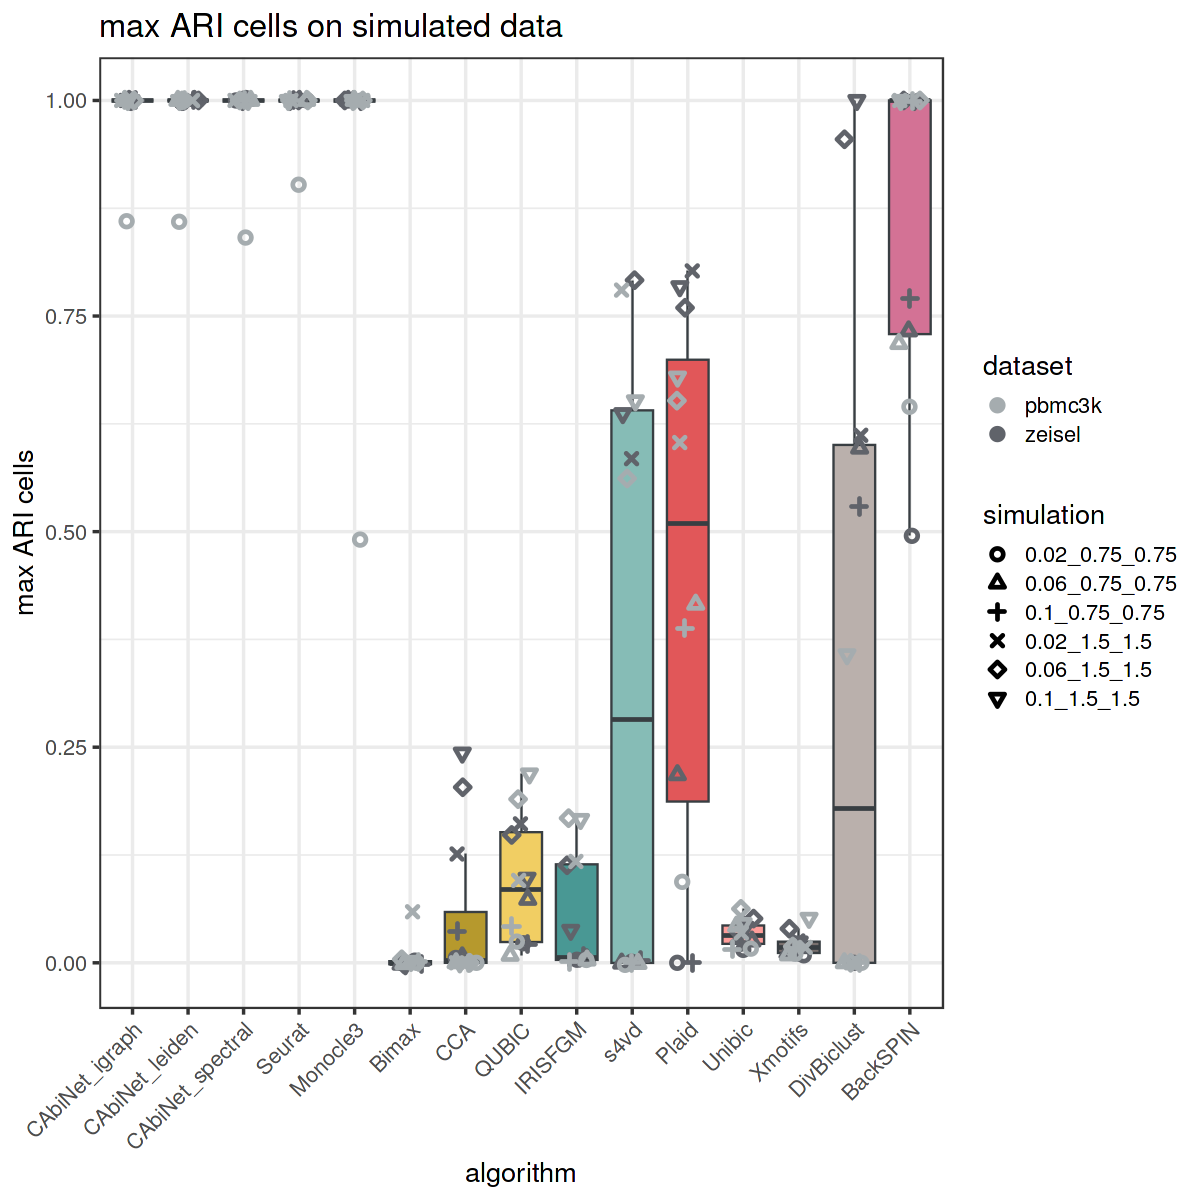

In [11]:

p <- df %>%
ggplot(aes(x=algorithm, 
           y=max_ARI_cells)) +
    geom_boxplot(aes(fill = algorithm),
                 color = "#383e42", 
                 alpha = 1, 
                 outlier.alpha = 0)+
    geom_jitter(aes(x=algorithm, 
                    y=max_ARI_cells, 
                    color = dataset, 
                    group = dataset, 
                    shape = simulation),
                    stroke =1.5,
                    size = 2,
                    width = 0.2) +
    labs(title = "max ARI cells on simulated data",
         y = "max ARI cells",
         x = "algorithm") +
    scale_shape_manual(values = seq_len(length(df$simulation))) +
    ggthemes::scale_fill_tableau(palette = "Tableau 20",
                              type = "regular",
                              direction = 1)+
    scale_color_manual(values = list("zeisel" = "#60636a", "pbmc3k" = "#a5acaf")) + 
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    guides(fill = "none")

p


#ggsave(plot = p, 
#       filename = file.path(outdir, "max_ARI_cells_summary_suppl_fig7a.pdf"),
#       width = 3000,
#       height = 2000,
#       units = "px")


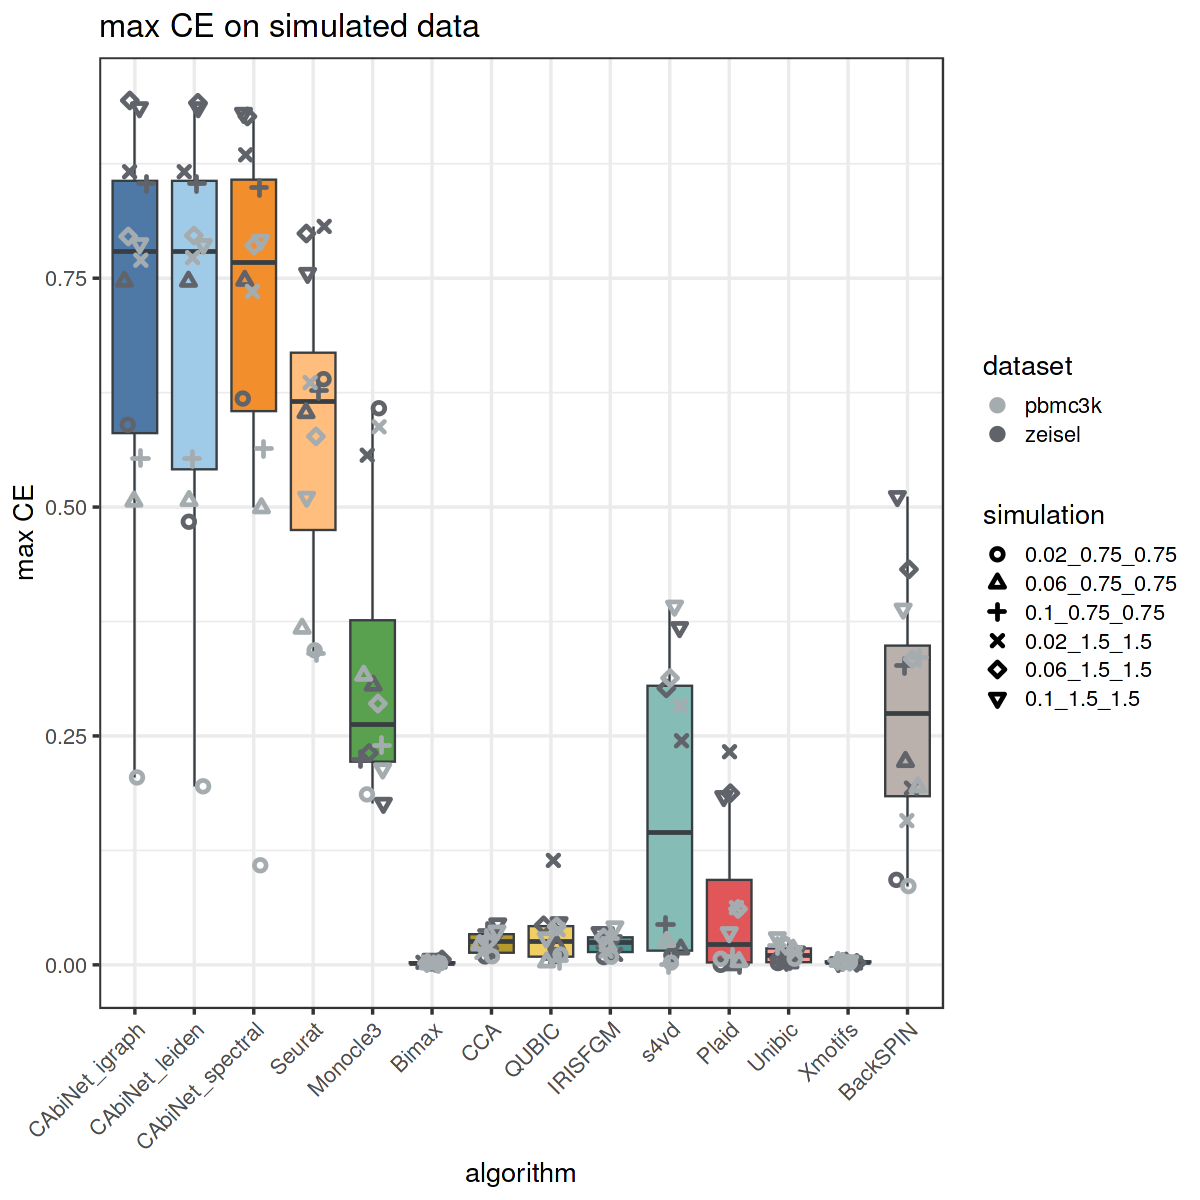

In [12]:
p <- df %>% filter(algorithm != 'DivBiclust') %>%
ggplot(aes(x=algorithm, 
           y=max_CE)) +
    geom_boxplot(aes(fill = algorithm),
                 color = "#383e42", 
                 alpha = 1, 
                 outlier.alpha = 0)+
    geom_jitter(aes(x=algorithm, 
                    y=max_CE, 
                    color = dataset, 
                    group = dataset, 
                    shape = simulation),
                    stroke =1.5,
                    size = 2,
                    width = 0.2) +
    labs(title = "max CE on simulated data",
         y = "max CE",
         x = "algorithm") +
    scale_shape_manual(values = seq_len(length(df$simulation))) +
    ggthemes::scale_fill_tableau(palette = "Tableau 20",
                              type = "regular",
                              direction = 1)+
    scale_color_manual(values = list("zeisel" = "#60636a", "pbmc3k" = "#a5acaf")) + 
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    guides(fill = "none")

p


#ggsave(plot = p, 
#       filename = file.path(outdir, "max_CE_summary_suppl_fig7b.pdf"),
#       width = 3000,
#       height = 2000,
#       units = "px")


# Benchmarking on experimental data

## Load the evaluation results of simulated and real data sets

The evaluation results are generated with script Benchmarking/cluster_submit_real.sh and Benchmarking/cluster_submit_sm.sh first, then collected into data.frames by script collate_results.R (See README.md file in folder Benchmarking/)
Change the paths of files to your local directories before running it

In [13]:
evldir = '../Benchmarking/results/realdata/collated_results/'


## Read and gather evaluation results of both simulated and real data

In [14]:
### Load the results of real data sets
files = list.files(evldir, '*.rds', full.names = T)
df = data.frame()
for (file in files){
  
  data = readRDS(file)
  df = rbind(df, data)
  
}
df$dataset = gsub('_filtered', '', df$dataset)

### Simulated data sets

simdf <- rbind(dfz, dfp)
simdf$dataset = paste0(simdf$dataset, '_', simdf$simulation)

# simdf$dataset = paste(simdf$dataset, simdf$dePROB, simdf$defacLOC, simdf$defacSCALE, sep = '_')

commoncols = intersect(colnames(df), colnames(simdf))

### Merge two data frames
df = rbind(df[,commoncols], simdf[, commoncols])


library(dplyr)
df %>% filter(algorithm != 'BC_Spectral') %>%
        mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
        mutate(algorithm = gsub("divbiclust", "DivBiclust", algorithm)) %>%
        mutate (algorithm = gsub('sv4d', 's4vd', algorithm)) %>%
        mutate(pattern = paste0(algorithm, dataset)) ->df

df %>% group_by(dataset, algorithm) %>% 
        mutate(fail.n = sum(is.na(ARI_cells)), scsd.n = n()) %>% 
        filter(fail.n == scsd.n | (scsd.n == 0)) -> test

## pick the runs which 
test %>% group_by(algorithm, dataset) %>% 
        arrange(runtime) %>% 
        select(-fail.n, -scsd.n) %>% 
        top_n(n = 1, wt = runtime) -> df_na

run_stat = table(df$algorithm, df$dataset)
run_stat

                  
                   BaronPancreas Darmanis FreytagGold PBMC_10X
  BackSPIN                     0      108         108      108
  Bimax                       51       79         108       51
  CAbiNet_igraph             108      108         108      108
  CAbiNet_leiden             108      108         108      108
  CAbiNet_spectral           108      108         108      108
  CCA                        108       90         108      104
  DivBiclust                 108      108         108      108
  IRISFGM                     81       81          81       81
  Monocle3                   108      108         108      108
  Plaid                      108      108         108      108
  QUBIC                      108      108         108      108
  Seurat                     108      108         108      108
  Unibic                      93      108         108      104
  Xmotifs                    108      108         108      108
  s4vd                       108    

### Rename data sets & algorithms

In [15]:



# Find row and column indices of cells equal to 0
zero_indices <- which(run_stat == 0, arr.ind = TRUE)

# Create a data frame with row names and column names
zero_df <- data.frame(
  algorithm = rownames(run_stat)[zero_indices[, 1]],
  dataset = colnames(run_stat)[zero_indices[, 2]]
)
zero_df %>% mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
        mutate(algorithm = gsub("divbiclust", "DivBiclust", algorithm)) %>%
        mutate (algorithm = gsub('sv4d', 's4vd', algorithm)) -> zero_df

df_na = dplyr::bind_rows(df_na, zero_df)

subdf = df[!(df$pattern %in% test$pattern), ]
subdf = subdf[!is.na(subdf$ARI_cells),]
subdf = rbind(subdf, df_na)

subdf$dataset[subdf$dataset == 'PBMC_10X'] = 'PBMC10x'
subdf$dataset[subdf$dataset == "Tirosh_nonmaglignant"] = "Tirosh"
subdf$dataset[subdf$dataset == "ZeiselBrain"] = "zeisel"
subdf$dataset[subdf$dataset == "dmel_E14-16h"] = "DmelSpatial"
subdf$dataset[subdf$dataset == "tabula_sapiens_tissue"] = 'TabulaSapiens'
subdf$dataset[subdf$dataset == "brain_organoids"] = "BrainOrganoids"


subdf$algorithm = factor(subdf$algorithm, levels = c('CAbiNet_igraph',
                                                'CAbiNet_leiden',
                                                'CAbiNet_spectral',
                                                'Seurat',
                                                'Monocle3',
                                                'Bimax',
                                                'CCA',
                                                'QUBIC',
                                                'IRISFGM',
                                                's4vd',
                                                'Plaid',
                                                'Unibic',
                                                'Xmotifs',
                                                'DivBiclust',
                                                'BackSPIN'
                                                ))

df_g <- subdf %>% group_by(algorithm, dataset) %>% mutate(Mean_ARI = mean(ARI_cells), 
                                               Max_ARI = max(ARI_cells),
                                               Median_ARI = median(ARI_cells))
df_g = df_g[df_g$dataset != 'HeOrganAtlas',]
df_g$dataset = factor(df_g$dataset, levels = c("Darmanis", 
                                               "FreytagGold", 
                                               "PBMC10x", 
                                               "Tirosh", "zeisel", 
                                               "BaronPancreas",
                                               "DmelSpatial", 
                                               "TabulaSapiens", 
                                               "BrainOrganoids", 
                                                unique(simdf$dataset)))



In [16]:
sidedf = data.frame(algorithm = unique(df_g$algorithm))
rownames(sidedf) = sidedf$algorithm
sidedf$scRNA_seq = 0
sidedf$scRNA_seq[sidedf$algorithm %in% c('CAbiNet_igraph', 
                                         'CAbiNet_leiden', 
                                         'CAbiNet_spectral', 
                                         'Seurat', 
                                         'Monocle3', 
                                         'IRISFGM',
                                         'DivBiclust',
                                          'BackSPIN')] = 1

sidedf$bicluster = 1
sidedf$bicluster[sidedf$algorithm %in% c( 'Seurat', 'Monocle3', 'DivBiclust')] = 0



In [17]:
# idx = match(sidedf$algorithm, c('CAbiNet_leiden','CAbiNet_spectral',
#                                                      'Seurat', 'Monocle3',
#                                                       'Bimax', 'CCA',
#                                                      'QUBIC', 'IRISFGM',
#                                                       'Plaid', 's4vd', 
#                                                      'Unibic','Xmotifs'))
sidedf = sidedf[rev(c('CAbiNet_igraph',
                        'CAbiNet_leiden',
                        'CAbiNet_spectral',
                        'Seurat',
                        'Monocle3',
                        'Bimax',
                        'CCA',
                        'QUBIC',
                        'IRISFGM',
                        's4vd',
                        'Plaid',
                        'Unibic',
                        'Xmotifs',
                        'DivBiclust',
                        'BackSPIN'
                        )),]


In [18]:
sidedf 

,algorithm,scRNA_seq,bicluster
,<fct>,<dbl>,<dbl>
BackSPIN,BackSPIN,1,1
DivBiclust,DivBiclust,1,0
Xmotifs,Xmotifs,0,1
Unibic,Unibic,0,1
Plaid,Plaid,0,1
s4vd,s4vd,0,1
IRISFGM,IRISFGM,1,1
QUBIC,QUBIC,0,1
CCA,CCA,0,1


In [19]:
sidemat = as.matrix(sidedf[, 2:3])
rownames(sidemat) = sidedf$algorithm
bicol = c('#499894', '#FF9D9A')

pheatmap::pheatmap(sidemat, cluster_rows = F, cluster_cols = F, col = bicol,
                   filename = file.path(outdir,'category_tableau.pdf'), width = 2.5, height = 4.5)


### Figure 5c: The average ARI scores 

Warning message:
“Removed 20 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 20 rows containing missing values (`geom_text()`).”


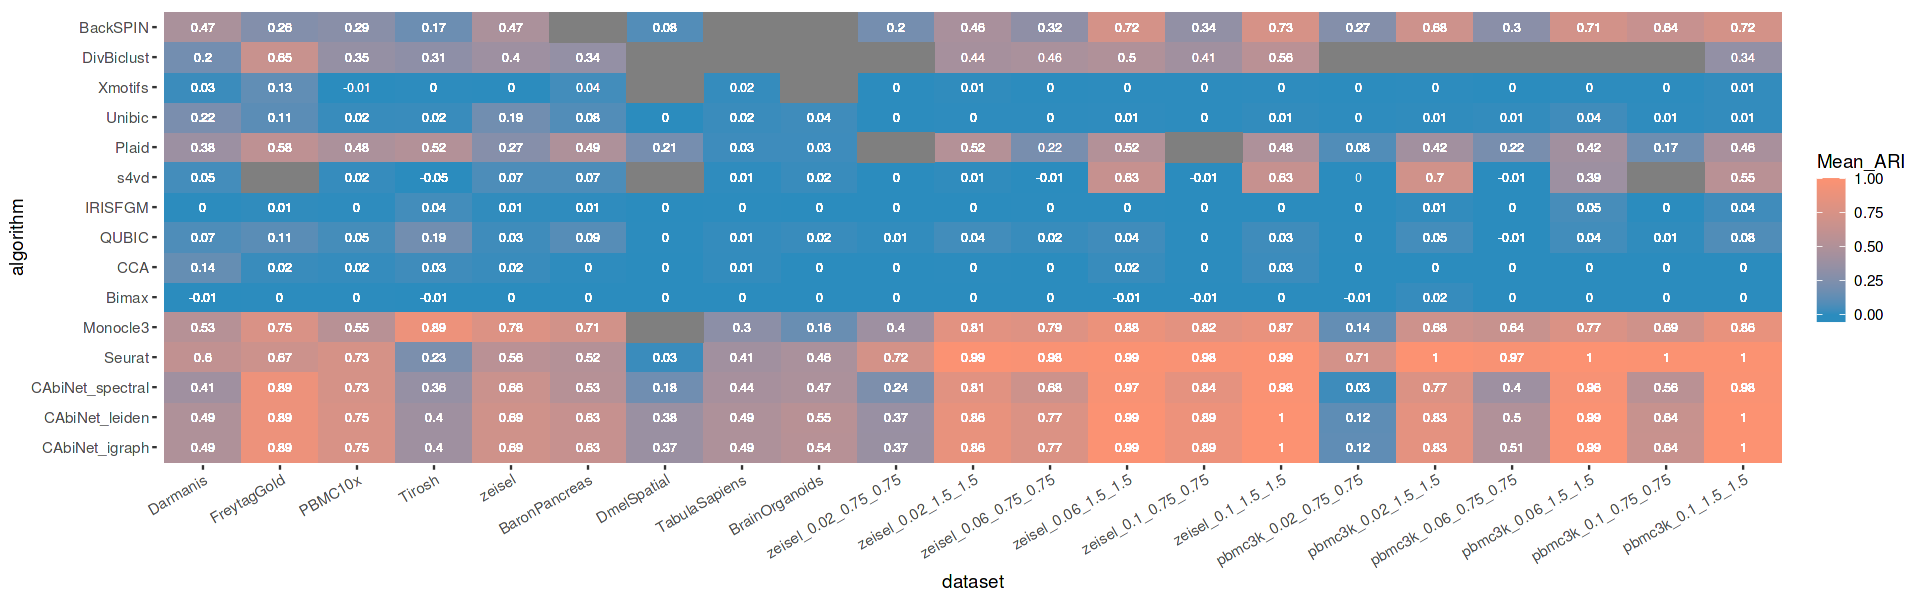

In [20]:
options(repr.plot.width=16, repr.plot.height=5)

p = ggplot(df_g, aes(dataset, algorithm, fill = Mean_ARI)) + geom_tile() + theme_bw() +
  geom_text(aes(label = round(Mean_ARI, 2)), color = "white", size = 2.5) +
  scale_fill_gradient2(low = "#2b8cbe",  #"#03436A",
                       mid = "#2b8cbe",
                       high = "#fc9272") +
  labs(xlab = 'Dataset', ylab = 'Algorithm') +
  theme(panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        axis.text.x = element_text(angle = 30, hjust = 1)) 

ggsave(plot = p, 
       filename = file.path(outdir, "mean_ARI_fig5_panel_c.pdf"), width = 9, height = 4)
p

## Supplementary figure 6
### Running time of CAbiNet on experimental data sets

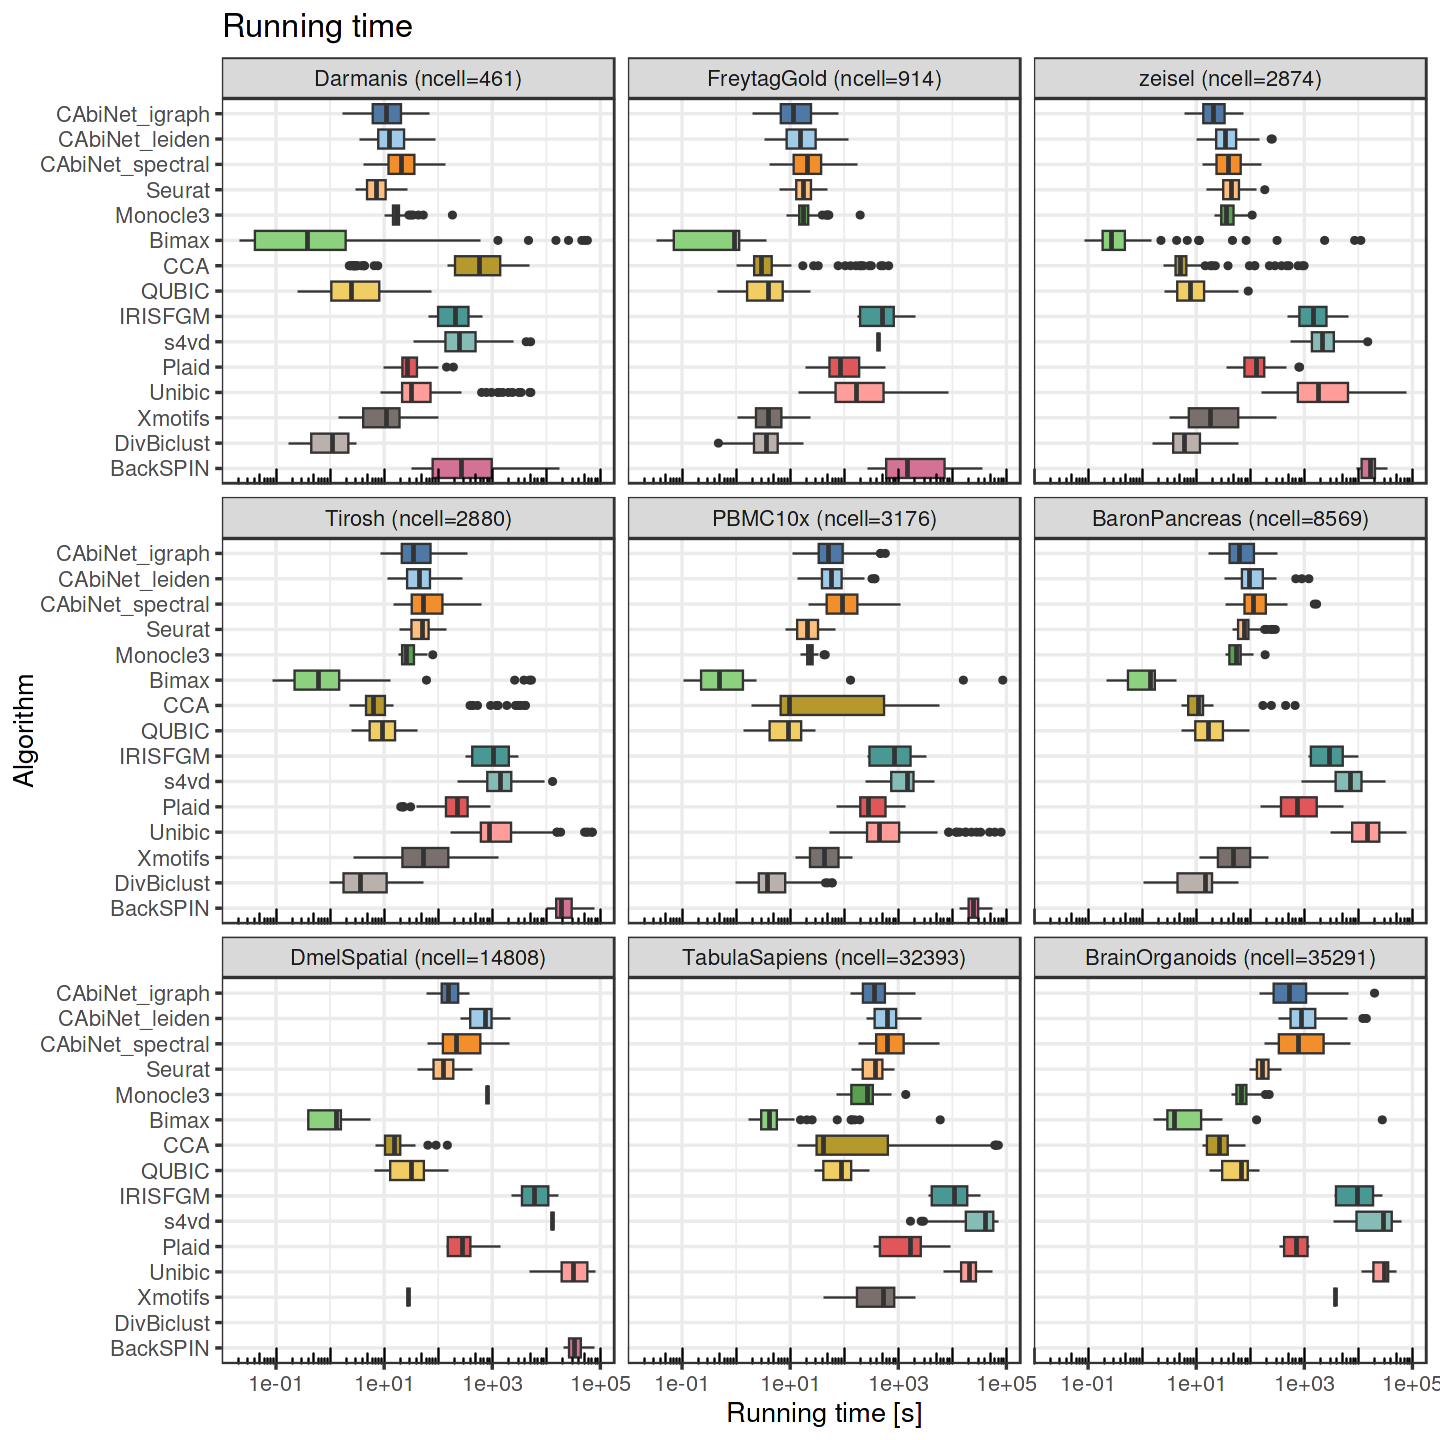

In [21]:
library(tidyverse)
library(RColorBrewer)
library(ggplot2)
options(repr.plot.width=12, repr.plot.height=12)

total_runtime <- subdf %>% filter(sim == FALSE) %>%
    mutate(algorithm = gsub("caclust", "CAbiNet", algorithm)) %>%
    mutate(total_runtime = if_else(condition = is.na(runtime_dimreduc),
                                   true = runtime,
                                   false = runtime + runtime_dimreduc)) %>%
    mutate(algorithm = gsub("sv4d", "s4vd", algorithm)) %>%
    mutate(algorithm = factor(algorithm, levels =c('CAbiNet_igraph',
                                                'CAbiNet_leiden',
                                                'CAbiNet_spectral',
                                                'Seurat',
                                                'Monocle3',
                                                'Bimax',
                                                'CCA',
                                                'QUBIC',
                                                'IRISFGM',
                                                's4vd',
                                                'Plaid',
                                                'Unibic',
                                                'Xmotifs',
                                                'DivBiclust',
                                                'BackSPIN'))) %>%
    mutate(dataset = factor(dataset, levels = c("Darmanis", "FreytagGold", "PBMC10x", 
                                               "Tirosh", "zeisel", "BaronPancreas",
                                               "DmelSpatial", "TabulaSapiens", "BrainOrganoids"))) %>%
    mutate(size = paste0(dataset,' (ncell=', ncells, ')')) %>%
    mutate(size = factor(size, levels = c( 'Darmanis (ncell=461)',
                                           'FreytagGold (ncell=914)',   
                                           'zeisel (ncell=2874)',
                                           'Tirosh (ncell=2880)',
                                           'PBMC10x (ncell=3176)',
                                           'BaronPancreas (ncell=8569)',
                                           'DmelSpatial (ncell=14808)',
                                           'TabulaSapiens (ncell=32393)',
                                           'BrainOrganoids (ncell=35291)'
                                          )))

p <- ggplot(total_runtime, aes(x=algorithm, y = total_runtime, fill = algorithm)) +
    geom_boxplot() + 
    facet_wrap(~size, ncol= 3) +
    scale_y_log10() +
    annotation_logticks(sides = "b") +
    scale_x_discrete(limits = rev(levels(total_runtime$algorithm))) +
    coord_flip() +
    labs(title = "Running time",
         y = "Running time [s]",
         x = "Algorithm") +
    theme_bw() +
    ggthemes::scale_fill_tableau(palette = "Tableau 20") +
    scale_color_manual(values = list("zeisel" = "#cf3e53", "pbmc3k" = "#466f9d")) + # "#ed444a"
    theme_bw(base_size = 16) +
    theme(legend.position = "none")


p

#
ggsave(plot = p, 
       filename = file.path(outdir, "total_runtime_sfig_realdata.pdf"),
       width = 10, height = 10)
       # width = 2200,
       # height = 2000,
       # units = "px")

# R environment

In [23]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: MarIuX64 2.0 GNU/Linux

Matrix products: default
BLAS:   /pkg/R-4.2.1-0/lib/R/lib/libRblas.so
LAPACK: /pkg/R-4.2.1-0/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8 LC_NUMERIC=C         LC_TIME=C           
 [4] LC_COLLATE=C         LC_MONETARY=C        LC_MESSAGES=C       
 [7] LC_PAPER=C           LC_NAME=C            LC_ADDRESS=C        
[10] LC_TELEPHONE=C       LC_MEASUREMENT=C     LC_IDENTIFICATION=C 

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-3 forcats_0.5.1      stringr_1.5.0      dplyr_1.1.0       
 [5] purrr_1.0.0        readr_2.1.2        tidyr_1.2.1        tibble_3.2.1      
 [9] ggplot2_3.4.3      tidyverse_1.3.2   

loaded via a namespace (and not attached):
 [1] lubridate_1.8.0     assertthat_0.2.1    digest_0.6.33      
 [4] utf8_1.2.3          IRdisplay_1.1       R6_2.5.1   